In [1]:
import os
import umap
import json
import torch
import itertools
from core import *
import numpy as np
import pandas as pd
import pickle as pkl
from torch import nn
import os.path as op
from tqdm import tqdm
from time import time
from copy import deepcopy
from torch.optim import Adam
from tpot import TPOTRegressor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from capsules.capsules import *
from matplotlib import rcParams
from IPython.display import Image
from matplotlib.lines import Line2D
from torch.autograd import Variable
from matplotlib.patches import Patch
from torch.optim.lr_scheduler import StepLR
from scipy.stats import spearmanr, pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import accuracy_score, matthews_corrcoef, precision_score, recall_score

In [2]:
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset

In [3]:
import gpytorch
from gpytorch.means import ConstantMean, LinearMean
from gpytorch.models import ApproximateGP, ExactGP 
from sklearn.metrics import accuracy_score
from gpytorch.priors import SmoothedBoxPrior
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.kernels import ScaleKernel, RBFKernel, GridInterpolationKernel
from gpytorch.mlls import VariationalELBO, VariationalELBOEmpirical, DeepApproximateMLL
from gpytorch.distributions import MultivariateNormal
from gpytorch.variational import CholeskyVariationalDistribution
from gpytorch.variational import VariationalStrategy
from gpytorch.models.deep_gps import DeepGPLayer, DeepGP

In [4]:
from collections import Counter
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [5]:
np.random.seed(99)
torch.manual_seed(99)
torch.cuda.manual_seed(99)

In [6]:
from reproduce_ablation_study import *

In [25]:
params = [
    [0, 26, 26], #gRNA+PAM+Flanks
    [2, -1, 23], #gRNA+PAM
    [2, -4, 20], #gRNA
    [2, -5, 19], #gRNA-1 nt seed
    [2, -6, 18], #gRNA-2 nt seed
    [2, -7, 17], #gRNA-3 nt seed
    [2, -8, 16], #gRNA-4 nt seed
    [2, -9, 15], #gRNA-5 nt seed
    [2, -10, 14], #gRNA-6 nt seed
    [2, -11, 13], #gRNA-7 nt seed
    [2, -12, 12], #gRNA-8 nt seed
    [2, -13, 11], #gRNA-9 nt seed
    [2, -14, 10], #gRNA-10 nt seed
    [2, -15, 9], #gRNA-11 nt seed
    [2, -16, 8], #gRNA-12 nt seed
    [2, -17, 7], #gRNA-13 nt seed
    [2, -18, 6], #gRNA-14 nt seed
    [2, -18, 5] #gRNA-15 nt seed
]

In [26]:
r2 = []
for start,end,length in params:
    print(start, end, length)
    r2.append(train_JostSet_for_original(start, end, length)[1])

0 26 26
0 26 26
ACGTGGGGCGAGGCGGTGAGTGTGGC
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
  1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 0.]]
(4, 26)
X: (26248, 4, 26, 2)
y: (26248,)
series: (26248,)
bin edges: [0.  0.2 0.4 0.6 0.8 1. ]
{3: 0.24181692962264334, 4: 0.13469232944904358, 0: 0.05031090482081841, 1: 0.2819629309088928, 2: 0.29121690519860194}
Epoch 1/8
657/657 [==============================] - 4s 5ms/step - loss: 0.0082 - mse: 0.1979 - val_loss: 0.0475 - val_mse: 0.0987
Epoch 2/8
657/657 [==============================] - 5s 8ms/step - loss: 0.0044 - mse: 0.0896 - val_loss: 0.0343 - val_mse: 0.0714
Epoch 3/8
657/657 [==============================] - 9s 14ms/step - loss: 0.0038 - mse: 0.0748 - val_loss: 0.0327 - val_mse: 0.0680
Epoch 4/8
657/6

X: (26248, 4, 17, 2)
y: (26248,)
series: (26248,)
bin edges: [0.  0.2 0.4 0.6 0.8 1. ]
{3: 0.24572043610941996, 4: 0.13735102373522745, 0: 0.049808960086720915, 1: 0.2798482744579505, 2: 0.28727130561068126}
Epoch 1/8
657/657 [==============================] - 5s 7ms/step - loss: 0.0083 - mse: 0.1989 - val_loss: 0.0485 - val_mse: 0.1010
Epoch 2/8
657/657 [==============================] - 5s 8ms/step - loss: 0.0048 - mse: 0.1000 - val_loss: 0.0408 - val_mse: 0.0849
Epoch 3/8
657/657 [==============================] - 5s 8ms/step - loss: 0.0042 - mse: 0.0822 - val_loss: 0.0381 - val_mse: 0.0794
Epoch 4/8
657/657 [==============================] - 5s 8ms/step - loss: 0.0039 - mse: 0.0753 - val_loss: 0.0358 - val_mse: 0.0746
Epoch 5/8
657/657 [==============================] - 5s 8ms/step - loss: 0.0036 - mse: 0.0700 - val_loss: 0.0356 - val_mse: 0.0742
Epoch 6/8
657/657 [==============================] - 5s 8ms/step - loss: 0.0033 - mse: 0.0631 - val_loss: 0.0339 - val_mse: 0.0710
Epoch 

Epoch 5/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0043 - mse: 0.0842 - val_loss: 0.0386 - val_mse: 0.0813
Epoch 6/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0042 - mse: 0.0822 - val_loss: 0.0429 - val_mse: 0.0898
Epoch 7/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0040 - mse: 0.0792 - val_loss: 0.0396 - val_mse: 0.0832
Epoch 8/8
657/657 [==============================] - 4s 6ms/step - loss: 0.0039 - mse: 0.0762 - val_loss: 0.0487 - val_mse: 0.1017
r squared = 0.465
2 -13 11
2 -13 11
GTGGGGCGAGG
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(4, 11)
X: (26248, 4, 11, 2)
y: (26248,)
series: (26248,)
bin edges: [0.  0.2 0.4 0.6 0.8 1. ]
{3: 0.2479771298209221, 2: 0.2894443247476719, 0: 0.05034640738329599, 4: 0.13409133686612826, 1: 0.27814080118198176}
Epoch 1/8
657/657 [==============================] - 4s 5ms/step - lo

657/657 [==============================] - 2s 3ms/step - loss: 0.0074 - mse: 0.1831 - val_loss: 0.0856 - val_mse: 0.1793
Epoch 3/8
657/657 [==============================] - 2s 3ms/step - loss: 0.0073 - mse: 0.1784 - val_loss: 0.0749 - val_mse: 0.1564
Epoch 4/8
657/657 [==============================] - 2s 3ms/step - loss: 0.0063 - mse: 0.1462 - val_loss: 0.0754 - val_mse: 0.1572
Epoch 5/8
657/657 [==============================] - 2s 3ms/step - loss: 0.0062 - mse: 0.1421 - val_loss: 0.0655 - val_mse: 0.1368
Epoch 6/8
657/657 [==============================] - 2s 3ms/step - loss: 0.0061 - mse: 0.1410 - val_loss: 0.0661 - val_mse: 0.1381
Epoch 7/8
657/657 [==============================] - 2s 3ms/step - loss: 0.0060 - mse: 0.1377 - val_loss: 0.0660 - val_mse: 0.1379
Epoch 8/8
657/657 [==============================] - 2s 3ms/step - loss: 0.0059 - mse: 0.1354 - val_loss: 0.0643 - val_mse: 0.1346
r squared = 0.228
2 -18 5
2 -18 5
GTGGGG
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1.

In [49]:
labels = "gRNA+PAM+Flanks,gRNA+PAM,gRNA,gRNA-1 nt seed,gRNA-2 nt seed,gRNA-3 nt seed,gRNA-4 nt seed,gRNA-5 nt seed,gRNA-6 nt seed,gRNA-7 nt seed,gRNA-8 nt seed,gRNA-9 nt seed,gRNA-10 nt seed,gRNA-11 nt seed,gRNA-12 nt seed,gRNA-13 nt seed,gRNA-14 nt seed,gRNA-15 nt seed".split(
        ","
    )

Text(0.5, 0, 'Experiment')

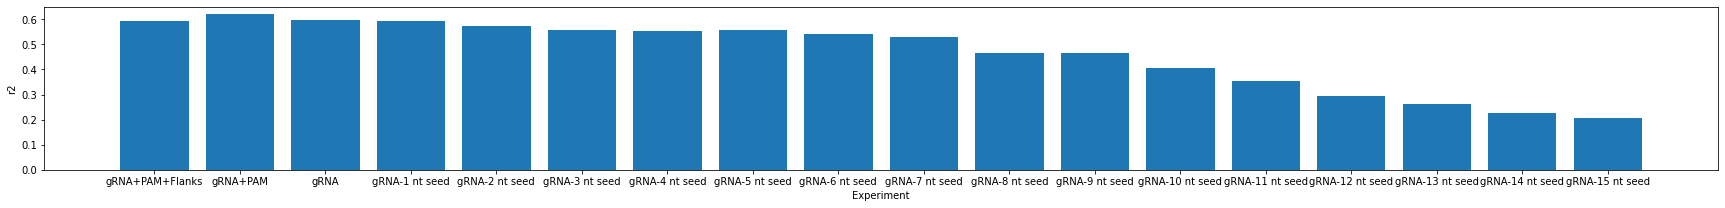

In [53]:
rcParams["figure.figsize"] = (30, 3)
plt.bar(np.arange(len(r2)), r2)
plt.xticks(
    ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    labels=labels
)
plt.ylabel(r"r2")
plt.xlabel("Experiment")